# Ecuaciones diferenciales ordinarias

Erwin Renzo Franco Diaz

Las ecuaciones diferenciales son parte fundamental de la física. Muchas leyes físicas como la segunda ley de Newton o las ecuaciones de Maxwell se expresan de esta manera, por lo que aprender resolverlas es de suma importancia. En esta sesión aprenderemos algunos métodos simbólicos y numéricos que ofrecen ciertos paquetes en Python para poder obtener la solución a ecuaciones diferenciales ordinarias. Primero veremos como resolverlas de manera simbólica usando el paquete $\texttt{sympy}$.

## Decaimiento radioactivo

Los núcleos radioactivos decaen de acuerdo a la ley

$$
\frac{dN}{dt} = - \lambda N
$$

donde $N$ es la concentración de los nucleidos en el tiempo $t$. 

La solución a esta ecuación es una exponencial que decae. Si en $t = 0$ se tiene una concentración inicial $N(0) = N_0$ 

$$
N = N_0 e^{-\lambda t}.
$$

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
t = sp.symbols('t', real = True)
N = sp.Function('N', real = True, positive = True)(t)
l = sp.symbols('lambda', real = True, positive = True)

#sin condiciones iniciales
eq = sp.Eq(sp.diff(N),  -l*N)
eq

Eq(Derivative(N(t), t), -lambda*N(t))

In [57]:
sol = sp.dsolve(eq, N)
sol

Eq(N(t), C1*exp(-lambda*t))

In [88]:
#con condiciones iniciales
N_0 = sp.symbols('N_0', positive = True)
sol_ci = sp.dsolve(eq, N, ics = {N.subs(t, 0): N_0})
sol_ci

Eq(N(t), N_0*exp(-lambda*t))

In [89]:
#hacemos que N sea una funcion numerica para graficarla
l_num = 0.2
N0_num = 1.0e5

N_num = sp.lambdify(t, sol_ci.subs([(l, l_num), (N_0, N0_num)]).rhs, 'numpy')

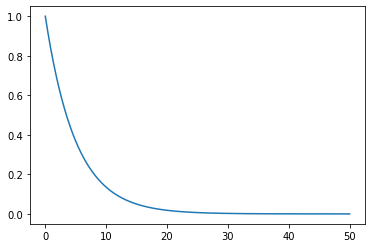

In [60]:
t_plot = np.linspace(0, 50, 1000)
N_plot = N_num(t_plot)/N0_num

plt.plot(t_plot, N_plot)

# Oscilador armónico

## Oscilador armónico simple

Una de los sistemas más importantes de la física, si es que no es el más importante, es el oscilador armónico cuya realización más simple es una partícula en un resorte. De la segunda ley de Newton y la ley de Hooke, la ecuación de movimiento que describe el oscilador armónico está dada por

$$
\frac{d^2 x}{dt^2} + \omega^2 x = 0 
$$

donde $x$ es la posición de la partícula y $\omega$ es su frecuencia. La solución general a esta ecuación está dada por

$$
x(t) = C_1 \cos(\omega t) + C_2 \sin(\omega t) = A\cos(\omega t + \phi)
$$

donde $C_1$ y $C_2$, u $\omega$ y $\phi$ dependen de las condiciones iniciales $x(0) = x_0$ y $\dot{x} (0) = \dot{x}_0$ 

In [62]:
x = sp.Function('x', real = True)(t)
w = sp.symbols('omega', real = True, positive = True)

eq_simple = sp.Eq(sp.diff(x, (t, 2)) + w**2*x, 0)
sol_simple = sp.dsolve(eq_simple, x)
sol_simple

Eq(x(t), C1*sin(omega*t) + C2*cos(omega*t))

In [63]:
x0 = sp.symbols('x_0', real = True)
x0dot = sp.symbols('\dot{x_0}', real = True)

sol_simple_ci = sp.dsolve(eq_simple, x, ics = {x.subs(t, 0): x0, sp.diff(x, t).subs(t, 0): x0dot})
sol_simple_ci 

Eq(x(t), \dot{x_0}*sin(omega*t)/omega + x_0*cos(omega*t))

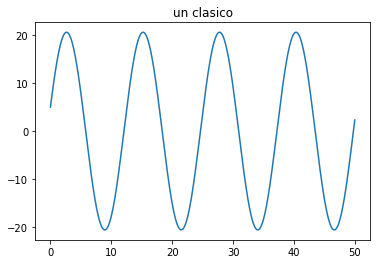

In [64]:
w_num = 0.5
x0_num = 5
x0dot_num = 10

x_simple_num = sp.lambdify(t, sol_simple_ci.subs([(w, w_num), (x0, x0_num), (x0dot, x0dot_num)]).rhs, 'numpy')

x_simple_plot = x_simple_num(t_plot)
plt.plot(t_plot, x_simple_plot)
plt.title('un clasico')
plt.show()

## Oscilador armónico amortiguado

Consideremos el caso en el que además se tiene una fuerza de resistencia proporcional a la velocidad de la partícula. La ecuación de movimiento será ahora

$$
\frac{d^2 x}{dt^2} + \gamma \dot{x}+ \omega^2 x = 0 
$$

cuya solución depende de los valores de $\gamma$ y $\omega$.

In [65]:
g = sp.symbols('gamma', real = True, positive = True)

eq_damped = sp.Eq(sp.diff(x, (t, 2)) + g*sp.diff(x, t) + w**2*x,  0)
eq_damped

Eq(gamma*Derivative(x(t), t) + omega**2*x(t) + Derivative(x(t), (t, 2)), 0)

### Sobreamortiguado

In [66]:
#sobreamortiguado
g_sobre = 2.5*2*w 

CI = {x.subs(t, 0): x0, sp.diff(x, t).subs(t, 0): x0dot}

eq_damped_sobre = eq_damped.subs(g, g_sobre)
sol_sobre = sp.simplify(sp.dsolve(eq_damped_sobre, x, ics = CI))

sol_sobre

Eq(x(t), (-(0.218217890235992*\dot{x_0} + 0.0455447255899809*omega*x_0)*exp(0.20871215252208*omega*t) + (0.218217890235992*\dot{x_0} + 1.04554472558998*omega*x_0)*exp(4.79128784747792*omega*t))*exp(-5.0*omega*t)/omega)

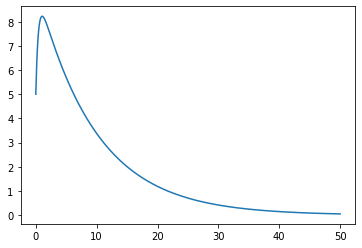

In [67]:
sol_sobre = sp.dsolve(eq_damped_sobre, x, ics = CI)

x_sobre_num = sp.lambdify(t, sol_sobre.subs([(w, w_num), (x0, x0_num), (x0dot, x0dot_num)]).rhs, 'numpy')

x_sobre_plot = x_sobre_num(t_plot)
plt.plot(t_plot, x_sobre_plot)

### Amortiguamiento crítico

In [68]:
#amortiguamiento critico
g_crit = 2*w

eq_damped_crit = eq_damped.subs(g, g_crit)
sol_crit = sp.dsolve(eq_damped_crit, x, ics = CI)
sol_crit

Eq(x(t), (t*(\dot{x_0} + omega*x_0) + x_0)*exp(-omega*t))

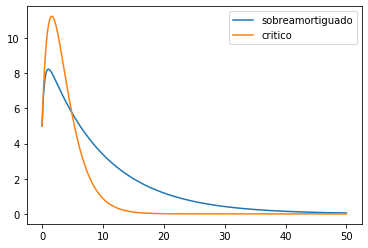

In [69]:
x_crit_num = sp.lambdify(t, sol_crit.subs([(w, w_num), (x0, x0_num), (x0dot, x0dot_num)]).rhs, 'numpy')

x_crit_plot = x_crit_num(t_plot)
plt.plot(t_plot, x_sobre_plot, t_plot, x_crit_plot)
plt.legend(['sobreamortiguado', 'critico'])

### Subamortiguamiento

In [96]:
#subamortiguado
g_sub = 0.2*2*w 

eq_damped_sub = eq_damped_crit.subs(g_crit, g_sub)
sol_sub = sp.dsolve(eq_damped_sub, x, ics=CI)

sol_sub = sol_sub
sol_sub

Eq(x(t), (x_0*cos(0.979795897113271*omega*t) + 0.204124145231932*(5.0*\dot{x_0} + omega*x_0)*sin(0.979795897113271*omega*t)/omega)*exp(-0.2*omega*t))

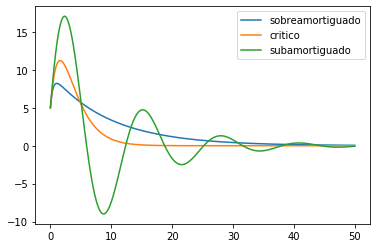

In [91]:
#ploteando
x_sub_num = sp.lambdify(t, sol_sub.subs([(w, w_num), (x0, x0_num), (x0dot, x0dot_num)]).rhs, 'numpy')

x_sub_plot = x_sub_num(t_plot)
plt.plot(t_plot, x_sobre_plot, t_plot, x_crit_plot, t_plot, x_sub_plot)
plt.legend(['sobreamortiguado', 'critico', 'subamortiguado'])

# Sistema de ecuaciones diferenciales

En una serie radioactiva con dos nucleidos diferentes con concentraciones $N_1(t)$ y $N_2(t)$, se tiene

\begin{align}
\frac{dN_1}{dt} &= -\lambda_1 N_1 \\
\frac{dN_2}{dt} &= \lambda_1 N_1 - \lambda_2 N_2\\
\end{align}

En $t = 0$, $N_1(0) = N_0$ y $N_2(0) = 0$ 

In [93]:
N1= sp.Function('N_1', real = True)(t)
N2= sp.Function('N_2', real = True)(t)
#l1, l2 = sp.symbols('lambda_1, lambda_2', real = True, positive = True)

l1_num = 0.5
l2_num = 0.7

eq1 = sp.Eq(sp.diff(N1), -l1_num*N1)
eq2 = sp.Eq(sp.diff(N2), l1_num*N1 - l2_num*N2)

eqs = [eq1, eq2]

N1_sol, N2_sol = sp.dsolve(eqs, [N1, N2], ics = {N1.subs(t, 0): N_0, N2.subs(t, 0): 0})

N2_sol

Eq(N_2(t), -2.5*N_0*exp(-0.7*t) + 2.5*N_0*exp(-0.5*t))

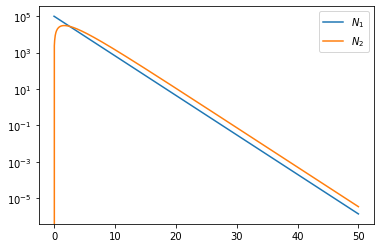

In [95]:
N1_num = sp.lambdify(t, N1_sol.subs(N_0, N0_num).rhs, 'numpy')
N2_num = sp.lambdify(t, N2_sol.subs(N_0, N0_num).rhs, 'numpy')

N1_plot = N1_num(t_plot)
N2_plot = N2_num(t_plot)

plt.plot(t_plot, N1_plot, t_plot, N2_plot)
plt.legend(['$N_1$', '$N_2$'])
plt.yscale('log')
plt.show()